# Thrust vectored AUV

![](rocket.png)
![](equations.png)

In [1]:
from sympy import *
init_printing()

In [2]:
# state
x, y, vx, vy, theta, omega = symbols('x y vx vy theta omega')
p = Matrix([x, y])
v = Matrix([vx, vy])
s = Matrix([p, v, [theta], [omega]])
s.T

[x  y  vx  vy  θ  ω]

In [3]:
# costate variables
lx, ly, lvx, lvy, ltheta, lomega = symbols('lambda_x lambda_y lambda_v_x lambda_v_y lambda_theta lambda_omega')
lp = Matrix([lx, ly])
lv = Matrix([lvx, lvy])
l = Matrix([lp, lv, [ltheta], [lomega]])
l.T

[λₓ  λ_y  λᵥ ₓ  λ_v_y  λ_θ  λ_ω]

In [4]:
# params: gravity, max thrust, mass, half length of auv
g, T, m, R, alpha = symbols('g T m R alpha')
params = Matrix([g, T, m, R])
params.T

[g  T  m  R]

In [5]:
# actions
u, phi = symbols('u phi')
actions = Matrix([u, phi])
actions.T

[u  φ]

In [6]:
# thrust vector tilt
t = Matrix([cos(theta + phi), sin(theta + phi)])

# rocket orientation
itheta = Matrix([cos(theta), sin(theta)])

# perpendicular direction to orientation
itau = Matrix([sin(theta), -cos(theta)])

In [7]:
# dynamics
dr = v
dv = T*u*t + Matrix([0, -g])
dtheta = omega
domega = -T*u/R/m * t.dot(itau)
ds = Matrix([dr, dv, [dtheta], [domega]])
ds

⎡                     vx                      ⎤
⎢                                             ⎥
⎢                     vy                      ⎥
⎢                                             ⎥
⎢               T⋅u⋅cos(φ + θ)                ⎥
⎢                                             ⎥
⎢             T⋅u⋅sin(φ + θ) - g              ⎥
⎢                                             ⎥
⎢                      ω                      ⎥
⎢                                             ⎥
⎢-T⋅u⋅(sin(θ)⋅cos(φ + θ) - sin(φ + θ)⋅cos(θ)) ⎥
⎢─────────────────────────────────────────────⎥
⎣                     R⋅m                     ⎦

In [8]:
# dynamic Lagrangian (minimise thrust usage)
L = (1- alpha)*T**2*u**2 + alpha*T*u
L

In [9]:
# Hamiltonian
H = l.dot(ds) + L
H

In [10]:
# optimal thrust direction
laux = (lv - lomega/R*itau)
lauxnorm = sqrt(sum([laux[i]**2 for i in range(len(laux))]))
lauxdir = laux/lauxnorm
tstar = -lauxdir
tstar.T

⎡                ⎛       λ_ω⋅sin(θ)⎞                                  ⎛       
⎢               -⎜λᵥ ₓ - ──────────⎟                                 -⎜λ_v_y +
⎢                ⎝           R     ⎠                                  ⎝       
⎢───────────────────────────────────────────────────  ────────────────────────
⎢     ______________________________________________       ___________________
⎢    ╱                    2                       2       ╱                   
⎢   ╱  ⎛       λ_ω⋅sin(θ)⎞    ⎛        λ_ω⋅cos(θ)⎞       ╱  ⎛       λ_ω⋅sin(θ)
⎢  ╱   ⎜λᵥ ₓ - ──────────⎟  + ⎜λ_v_y + ──────────⎟      ╱   ⎜λᵥ ₓ - ──────────
⎣╲╱    ⎝           R     ⎠    ⎝            R     ⎠    ╲╱    ⎝           R     

 λ_ω⋅cos(θ)⎞               ⎤
 ──────────⎟               ⎥
     R     ⎠               ⎥
───────────────────────────⎥
___________________________⎥
 2                       2 ⎥
⎞    ⎛        λ_ω⋅cos(θ)⎞  ⎥
⎟  + ⎜λ_v_y + ──────────⎟  ⎥
⎠    ⎝            R     ⎠  ⎦

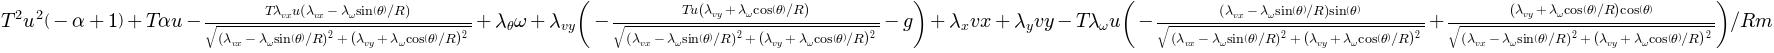

In [11]:
# new Hamiltonian with optimal thrust direction
dr = v
dv = T*u*tstar + Matrix([0, -g])
dtheta = omega
domega = -T*u/R/m * tstar.dot(itau)
ds = Matrix([dr, dv, [dtheta], [domega]])
Hstar = l.dot(ds) + L
Hstar

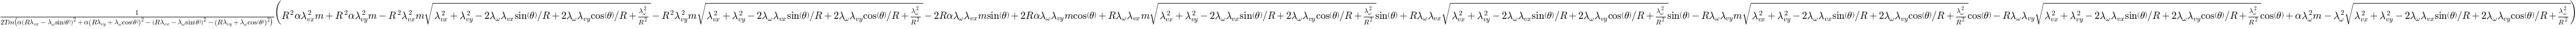

In [12]:
# optimal thrust magnitude (unbounded)
ustar = solve(Hstar.diff(u), u)[0]
ustar

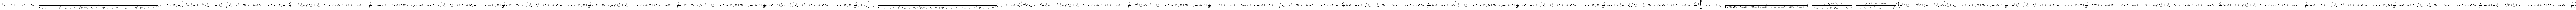

In [13]:
# new Hamiltonian with optimal thrust direction and magnitude
dr = v
dv = T*ustar*tstar + Matrix([0, -g])
dtheta = omega
domega = -T*ustar/R/m * tstar.dot(itau)
ds = Matrix([dr, dv, [dtheta], [domega]])
Hstar = l.dot(ds) + L
Hstar

In [14]:
# costate equations of motion
ds = Matrix([Hstar.diff(var) for var in s])
ds

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

$$
\begin{cases}
    \dot{\boldsymbol{r}} = \boldsymbol{v} \\
    \dot{\boldsymbol{v}} = \frac{T u}{m} \hat{\boldsymbol{t}} + \boldsymbol{g} \\
    \dot{\theta} = \omega \\
    \dot{\omega} = -\frac{T u}{R m} \hat{\boldsymbol{t}} \cdot \hat{\boldsymbol{i}}_\tau
\end{cases}
$$